In [1]:
# 성년의 날에는 향수를 선물하는 문화가 있다.
# '향수'와 '성년'이라는 키워드 검색량을 분석해서 실제로 성년의 날이 많이 활성화 되어있는가 알아보자.

In [48]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc
import warnings
warnings.simplefilter("ignore")


DIR_PATH = './Data_jaehun/'
naver_all = 'naver_all.xlsx'
naver_target = 'naver_target.xlsx'
naver_parent = 'naver_parent.xlsx'
naver_else = 'naver_else.xlsx'
kakao_all = 'kakao_all.xls'
kakao_target = 'kakao_target.xls'
kakao_parent = 'kakao_parent.xls'
kakao_else = 'kakao_else.xls'
kakao_else = 'kakao_else.xls'
shop_male = 'shop_male.csv'
shop_female = 'shop_female.csv'

naver_dic = {'naver_all.xlsx' : '전체(네이버)','naver_target.xlsx' : '20대(네이버)','naver_parent.xlsx' : '부모님 세대(네이버)','naver_else.xlsx' : '기타 세대(네이버)'}
kakao_dic = {'kakao_all.xls' : '전체(카카오)','kakao_target.xls' : '20대(카카오)','kakao_parent.xls' : '부모님 세대(카카오)','kakao_else.xls' : '기타 세대(카카오)'}

# 한글 폰트 설정
font_path = './Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [49]:
def naverdata(file):
    name = naver_dic[file]
    # 파일을 데이터프레임 화
    df = pd.read_excel(DIR_PATH + file,header=6)
    # 중복된 날짜컬럼 삭제
    df.drop(df.columns[2], axis = 1, inplace=True)
    # 데이터를 타입을 필요에 맞춰 변경
    df['날짜'] = df['날짜'].astype('datetime64')
    df['향수'] = df['향수'].astype(float)
    df['성년'] = df['성년'].astype(float)
    
    ShowData(df, name)

In [50]:
def kakaodata(file):
    name = kakao_dic[file]
    df = pd.read_excel(DIR_PATH + file, header=7)
    df = df[0:365]
    df.rename(columns={'일':'날짜'},inplace=True)
    df['날짜'] = df['날짜'].astype('datetime64')
    df['향수'] = df['향수'].astype(float)
    df['성년'] = df['성년'].astype(float)
    
    ShowData(df,name)

In [51]:
def ShowData(df, name):
    data_year = list(df['날짜'])
    data_list_01 = []
    data_list_02 = []
    
    for i in range(0, len(df.index)):
        data_01 = df[df.columns[1]][i]/df[df.columns[1]].max()
        data_02 = df[df.columns[2]][i]/df[df.columns[2]].max()
        data_list_01.append(data_01)
        data_list_02.append(data_02)
        
    # 데이터 스케일링 진행 후 시각화, 이중축 그래프 사용
    fig, ax = plt.subplots(figsize=(18,6))
    ax_1 = plt.plot(data_year, data_list_01, '-', label=(f'{df.columns[1]} 검색량'))
    ax_2 = plt.plot(data_year, data_list_02, 'o', color='red', ms=2.5, label=(f'{df.columns[2]} 검색량'))
    ax.set_title(f'{name} 검색량 비교')
    ax.legend()
    plt.show()

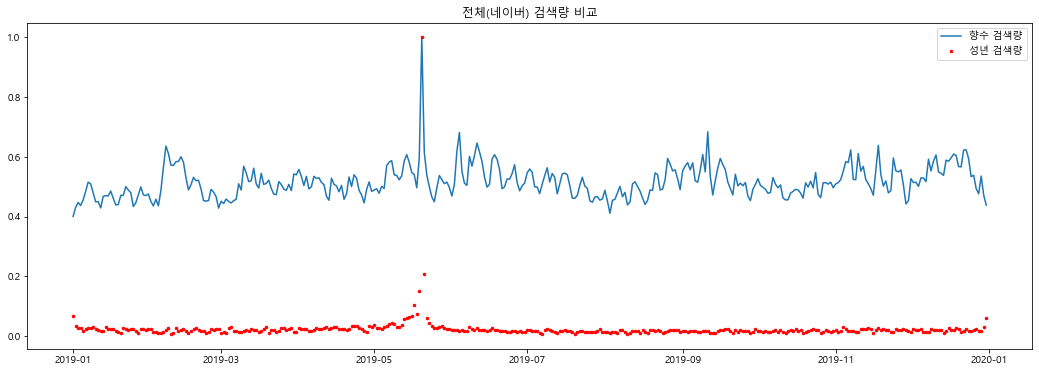

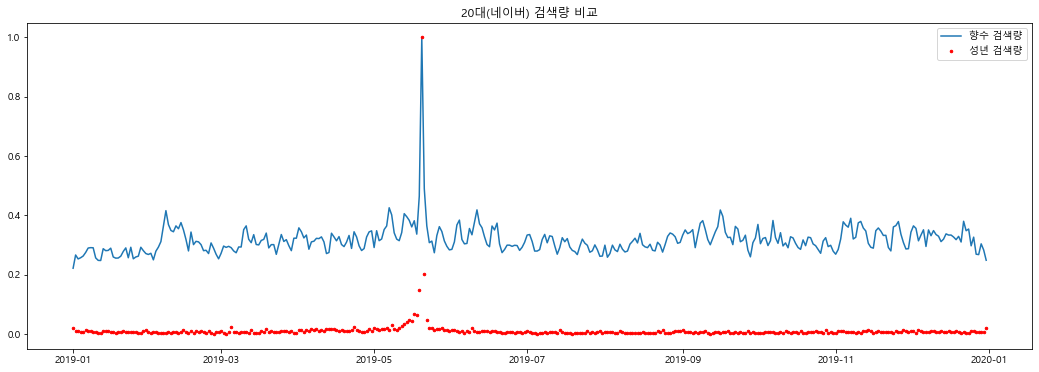

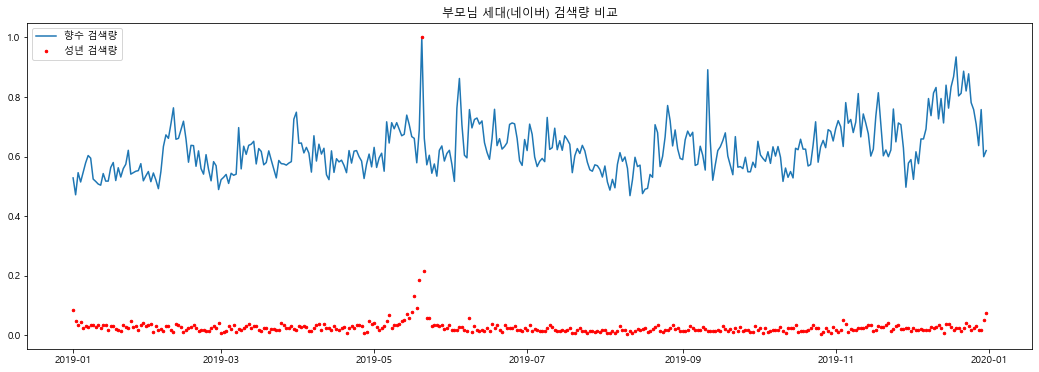

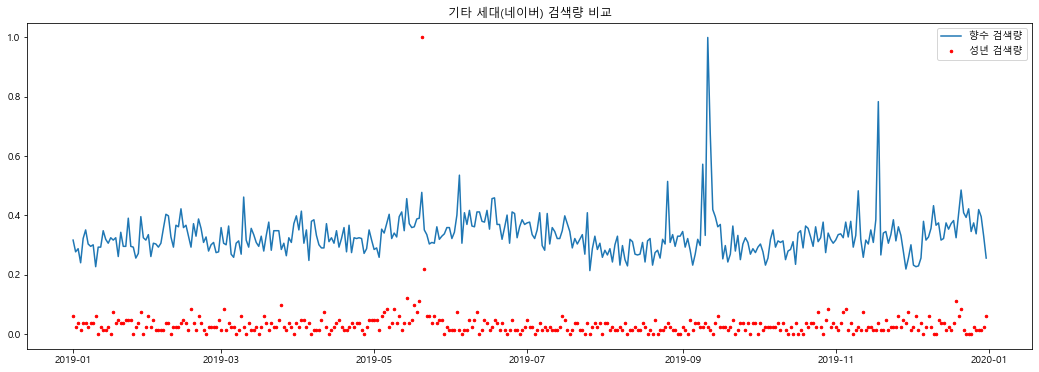

In [52]:
naverdata(naver_all)
naverdata(naver_target)
naverdata(naver_parent)
naverdata(naver_else)

#### 검색량을 비교 해본 결과 성년의 날에 직접적으로 해당되는 20대와 20대의 부모님 세대인 40~50대에는 두 키워드 간의 연관성을 보였다.

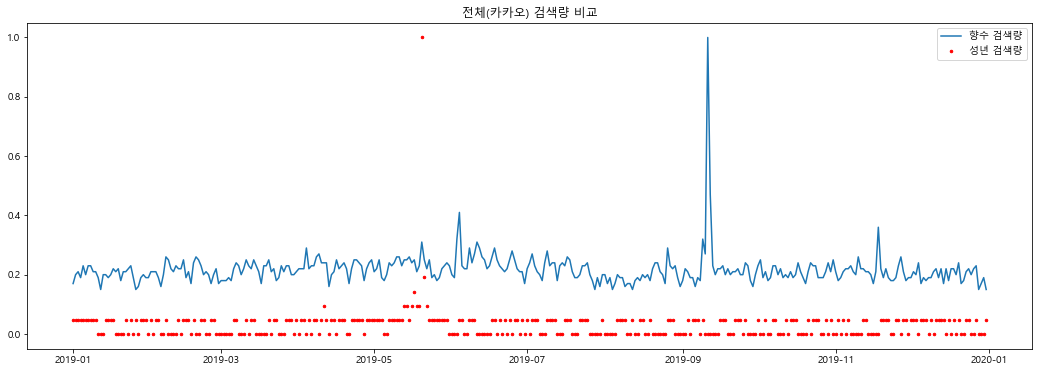

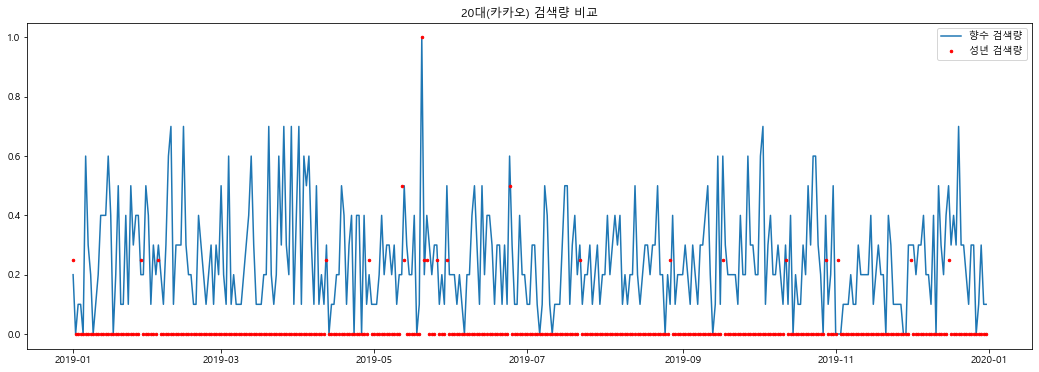

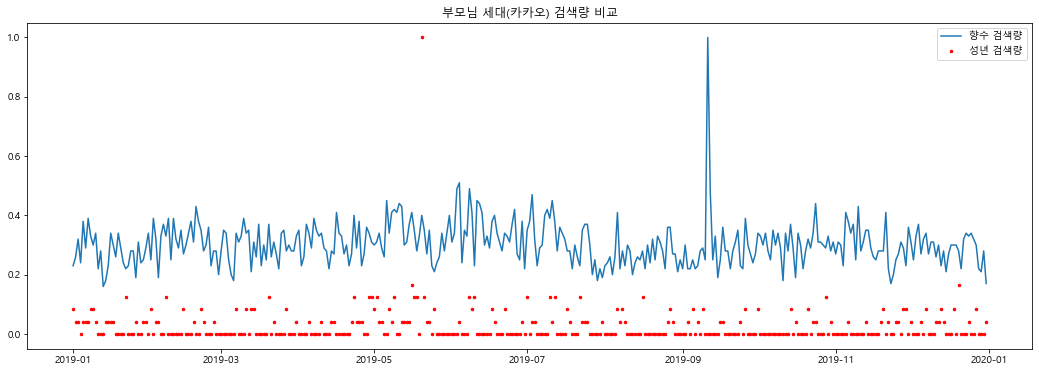

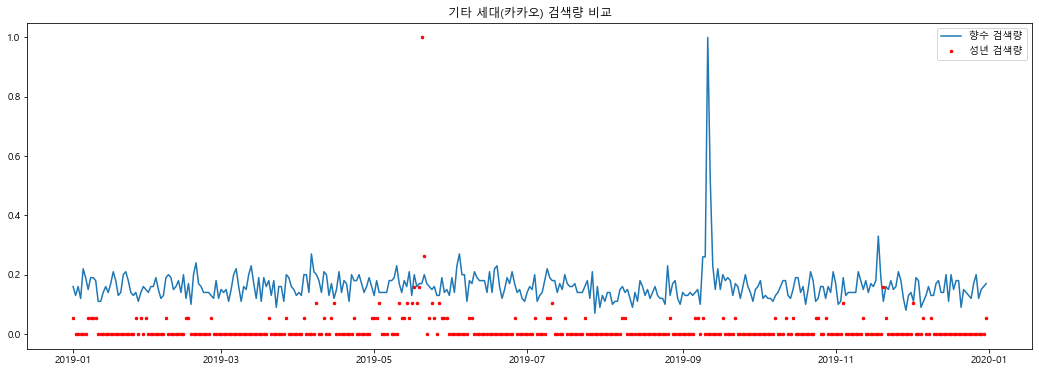

In [53]:
kakaodata(kakao_all)
kakaodata(kakao_target)
kakaodata(kakao_parent)
kakaodata(kakao_else)

#### 그러나 카카오 데이터 랩에서 동일한 키워드를 검색해본 결과 부모님 세대는 연관성을 보이지 않았고 20대만 네이버 데이터와 같은 결과를 보여줬다.

In [57]:
def shopdata(file):
    if file == shop_male : name = '남성'
    else : name = '여성'
    # 파일을 데이터프레임 화
    df = pd.read_csv(DIR_PATH + file, header=8)
    # 데이터를 타입을 필요에 맞춰 변경
    df['날짜'] = df['날짜'].astype('datetime64')
    df['남성향수'] = df['남성향수'].astype(float)
    df['여성향수'] = df['여성향수'].astype(float)
    df.set_index('날짜')
    
    # 데이터 스케일링 진행 후 시각화, 이중축 그래프 사용
    data_year = list(df['날짜'])
    data_list_01 = []
    data_list_02 = []
    
    for i in range(0, len(df.index)):
        data_01 = df[df.columns[1]][i]/df[df.columns[1]].max()
        data_02 = df[df.columns[2]][i]/df[df.columns[2]].max()
        data_list_01.append(data_01)
        data_list_02.append(data_02)
    fig, ax = plt.subplots(figsize=(18,6))
    ax_1 = plt.plot(data_year, data_list_01, '-', color='red', label=(f'{df.columns[1]} 검색량'))
    ax_2 = plt.plot(data_year, data_list_02, '-', label=(f'{df.columns[2]} 검색량'))
    ax.set_title(f'{name} 검색량 비교')
    ax.legend()
    plt.show()

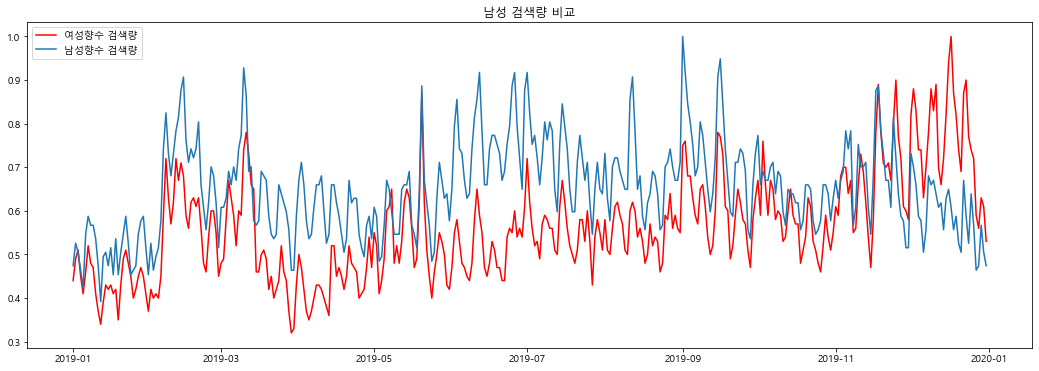

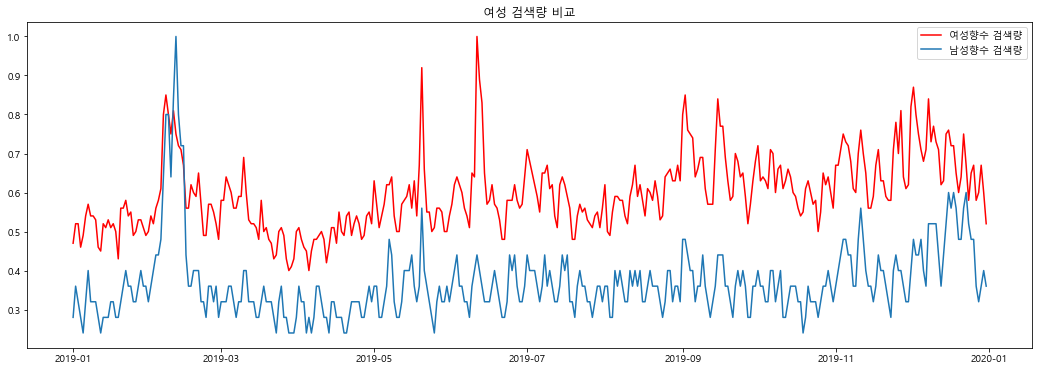

In [60]:
shopdata(shop_male)
shopdata(shop_female)

### 마지막으로 네이버 쇼핑 데이터랩의 20대 성별 향수의 검색량을 분석해보았다. 그러자 분명 성년의 날의 검색량이 변화를 보이기는 했지만 좀더 유의미한 변화를 보인 시기는 설날이나 크리스마스가 더 돋보였다. 하지만 성년의 날의 성년이라는 키워드가 높다는 점을 보았을 때 모든 연령대에서 성년의 날을 인식하고 있다는 점을 이용해서 화장품 회사에서 이를 활용한 적극적인 마케팅을 실시하면 좋은 결과로 이어질 수 있을 것이다.